# STOCK MARKET PREDICTION

## IMPORTING THE LIBRARIES
- **numpy** for numerical operations
- **pandas** data manipulation and analysis
- **yfinance** for downloading stock data
- **matplotlib.pyplot** for plotting graphs

In [37]:
import numpy as np
import pandas as pd

# Import YFinance Library
import yfinance as yf

# Download Stock Prices for Training and Testing from YFinance

## 1) Download Stock Data for Training (train_df)

In [38]:
# Download Stock Prices

# Ticker and start date, end date for Training 
stock_symbol = 'HDFCBANK.NS'
train_start_date = '2024-02-09'
train_end_date = '2024-03-01'

# Download Stock Price Data from Yahoo Finance
train_df = yf.download(stock_symbol, start=train_start_date, end=train_end_date, progress=False)
train_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-09,1392.150024,1414.199951,1387.000000,1403.599976,1403.599976,28321062
2024-02-12,1399.650024,1413.650024,1383.349976,1390.000000,1390.000000,17223906
2024-02-13,1391.949951,1404.349976,1384.349976,1394.449951,1394.449951,28790497
2024-02-14,1376.000000,1391.500000,1363.550049,1384.050049,1384.050049,45660405
2024-02-15,1385.000000,1415.500000,1384.349976,1414.050049,1414.050049,20792472
2024-02-16,1423.900024,1427.699951,1408.449951,1419.900024,1419.900024,16087871
2024-02-19,1429.000000,1429.000000,1415.199951,1417.099976,1417.099976,17225878
2024-02-20,1415.000000,1457.250000,1411.800049,1454.300049,1454.300049,28066754
2024-02-21,1464.000000,1464.000000,1435.000000,1439.150024,1439.150024,22946568


## 2) Downloading Stock Data for Testing (test_df)

In [39]:
# Download Stock Data from Predicting

# Ticker and start date, end date for Predicting 
test_start_date = '2024-03-01'
test_end_date = '2024-03-16'

# Download Stock Price Data from Yahoo Finance
test_df = yf.download(stock_symbol, start=test_start_date, end=test_end_date, progress=False)
print(test_df)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2024-03-01  1400.000000  1432.750000  1400.000000  1430.750000  1430.750000   
2024-03-04  1430.949951  1437.000000  1424.300049  1432.699951  1432.699951   
2024-03-05  1422.000000  1443.000000  1421.650024  1440.849976  1440.849976   
2024-03-06  1433.550049  1452.849976  1433.550049  1442.599976  1442.599976   
2024-03-07  1445.500000  1451.050049  1441.400024  1446.099976  1446.099976   
2024-03-11  1430.000000  1445.949951  1423.000000  1427.800049  1427.800049   
2024-03-12  1434.000000  1464.000000  1429.250000  1459.550049  1459.550049   
2024-03-13  1465.500000  1471.599976  1450.099976  1460.400024  1460.400024   
2024-03-14  1462.099976  1466.000000  1444.300049  1455.449951  1455.449951   
2024-03-15  1450.000000  1459.300049  1442.250000  1452.650024  1452.650024   

              Volume  
Date                  
2024-

## Extracting Working Days for which we want to predict the stock prices

In [40]:
# Extract dates to predict
prediction_dates = test_df.index
print(prediction_dates)

DatetimeIndex(['2024-03-01', '2024-03-04', '2024-03-05', '2024-03-06',
               '2024-03-07', '2024-03-11', '2024-03-12', '2024-03-13',
               '2024-03-14', '2024-03-15'],
              dtype='datetime64[ns]', name='Date', freq=None)


## Extracting Close Prices from Training Data

In [41]:
# Extract Close Price from Training data
prices_to_train = train_df[['High','Close','Low']].to_numpy()
print(prices_to_train)

[[1414.19995117 1403.59997559 1387.        ]
 [1413.65002441 1390.         1383.34997559]
 [1404.34997559 1394.44995117 1384.34997559]
 [1391.5        1384.05004883 1363.55004883]
 [1415.5        1414.05004883 1384.34997559]
 [1427.69995117 1419.90002441 1408.44995117]
 [1429.         1417.09997559 1415.19995117]
 [1457.25       1454.30004883 1411.80004883]
 [1464.         1439.15002441 1435.        ]
 [1428.80004883 1419.55004883 1412.19995117]
 [1433.90002441 1420.59997559 1418.        ]
 [1434.84997559 1422.30004883 1413.55004883]
 [1426.69995117 1420.15002441 1413.05004883]
 [1424.19995117 1409.40002441 1404.        ]
 [1410.40002441 1403.40002441 1397.30004883]]


## Import Library for Ridge regression model from scikit-learn

In [42]:
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

## Initialize an empty dictionary to store predicted prices " predicted_price = {} " ##

In [43]:
rr_predicted_price = {}  
svr_predicted_price = {}
knn_predicted_price = {}
dt_predicted_price = {}
rf_predicted_price = {}
ann_predicted_price = {}

# Loop through each date in the "prediction_dates" then train the model and make prediction of next day's closing price and then include this prediction in feature data and remove the oldest one and again trained the model -  #

## 1) Prepare 'features' (every 10 days' closing prices) and 'targets' (next day's closing price) for training the Ridge regression model:

- **features = []** - List to store the features (every 10 days' closing prices)
- **targets = []** - List to store the targets (next day's closing price)
- **for i in range(len(prices_to_train)-10):** - Loop through the training data
- **features.append(prices_to_train.values[i:i+10])** - # Add every 10 days' closing prices to features
- **targets.append(prices_to_train.iloc[i+10])** - # Add the next day's closing price to targets

## 2) Train the Ridge regression model with an alpha value
- **model = Ridge(alpha=10)** -  Create a Ridge regression model with alpha (regularization strength) set to higher values
- **model.fit(features, targets)** - Train the model on the features and targets

## 3) Make predictions for the next day's closing price:
- **last_sequence = features[-1]** -  Get the last 10 days' closing prices
- **last_sequence = last_sequence[1:]** - Remove the first element
- **
last_sequence = np.append(last_sequence, targets[-1]** -  Add the last actual price to the sequenc
- **
predict = model.predict(last_sequence.reshape(1, -1** - # Predict the next day's pri
- **e
predicted_price[date] = predict[** -  # Store the predicted price for the current d

## 4) Update the prices_to_train for the next iteration:
- **prices_to_train = prices_to_train[1:]** - Remove the first element from the training data
- **prices_to_train[date] = predict[-1]** - Add the predicted price to the training data for the next iterationnate

In [44]:
train_data = train_df[['Close', 'Open', 'Low', 'High']]
train_data = train_data.values


for date in prediction_dates:
    
    train_features = train_data[:-1]
    train_targets = train_data[1:]
    
    print(f"============================================= Date :  {date} ============================================================")
    print(f"\n============================================ Training Dataset : =======================================================")
    print("\n---- Close -------- Open -------- Low -------- High ------")
    for row in train_data:
        print(" | ".join([f"{x:.8f}" for x in row]))
    print(f"\n============================================ Features & Targets =============================================================")
    print()
    print("----------------------Features------------------------------- || -----------------------Targets------------------------------")
    print("  Close       |     Open      |      Low      |   High        ||  Close        |     Open      |      Low      |   High        ")
    print("-----------------------------------------------------------------------------------------------------------------------------")
    for feature, target in zip(train_features, train_targets):
        feature_str = " | ".join([f"{x:.8f}" for x in feature])
        target_str = " | ".join([f"{x:.8f}" for x in target])
        print(f"{feature_str} || {target_str}")
    
    model_rr = Ridge(alpha=10)
    model_rr.fit(train_features, train_targets)

    model_svr = MultiOutputRegressor(SVR(kernel='rbf', C=1e3))
    model_svr.fit(train_features, train_targets)

    model_knn = KNeighborsRegressor(n_neighbors=5)
    model_knn.fit(train_features, train_targets)

    model_dt = DecisionTreeRegressor()
    model_dt.fit(train_features, train_targets)
    
    model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
    model_rf.fit(train_features, train_targets)

    model_ann = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)
    model_ann.fit(train_features, train_targets)
    
    target_to_predict = train_targets[-1]
    
    rr_predict = model_rr.predict(target_to_predict.reshape(1, -1)) 
    rr_predicted_price[date] = rr_predict[-1]  

    svr_predict = model_svr.predict(target_to_predict.reshape(1, -1))
    svr_predicted_price[date] = svr_predict[-1]

    knn_predict = model_knn.predict(target_to_predict.reshape(1, -1))
    knn_predicted_price[date] = knn_predict[-1]

    dt_predict = model_dt.predict(target_to_predict.reshape(1, -1))
    dt_predicted_price[date] = dt_predict[-1]

    rf_predict = model_rf.predict(target_to_predict.reshape(1, -1))
    rf_predicted_price[date] = rf_predict[-1]

    ann_predict = model_ann.predict(target_to_predict.reshape(1, -1))
    ann_predicted_price[date] = ann_predict[-1]
    
    print()
    print("================================================ Features for Prediction : ================================================")
    print("\n---- Close -------- Open -------- Low -------- High ------")
    for elem in target_to_predict:
        print("{:.8f}".format(elem), end=' | ')
    print()

    print("\n============================================== Predicted Prices : =======================================================")
    print("---- Close -------- Open -------- Low -------- High ------")
    for row in rr_predict:
        print(" | ".join([f"{x:.8f}" for x in row]))
    print()

    train_data = train_data[1:]
    specific_date_row = test_df.loc[test_df.index == date, ['Close', 'Open', 'Low', 'High']].to_numpy()
    # Add the specific_date_row to prices_to_train
    train_data = np.append(train_data, specific_date_row, axis=0)
    

============================================= Date :  2024-03-01 00:00:00 ============================================================

============================================ Training Dataset : =======================================================

---- Close -------- Open -------- Low -------- High ------
1403.59997559 | 1392.15002441 | 1387.00000000 | 1414.19995117
1390.00000000 | 1399.65002441 | 1383.34997559 | 1413.65002441
1394.44995117 | 1391.94995117 | 1384.34997559 | 1404.34997559
1384.05004883 | 1376.00000000 | 1363.55004883 | 1391.50000000
1414.05004883 | 1385.00000000 | 1384.34997559 | 1415.50000000
1419.90002441 | 1423.90002441 | 1408.44995117 | 1427.69995117
1417.09997559 | 1429.00000000 | 1415.19995117 | 1429.00000000
1454.30004883 | 1415.00000000 | 1411.80004883 | 1457.25000000
1439.15002441 | 1464.00000000 | 1435.00000000 | 1464.00000000
1419.55004883 | 1417.75000000 | 1412.19995117 | 1428.80004883
1420.59997559 | 1422.55004883 | 1418.00000000 | 1433.90002441
14

C:\Users\mansu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



================================================ Features for Prediction : ================================================

---- Close -------- Open -------- Low -------- High ------
1460.40002441 | 1465.50000000 | 1450.09997559 | 1471.59997559 | 

============================================== Predicted Prices : =======================================================
---- Close -------- Open -------- Low -------- High ------
1442.84429099 | 1445.38758221 | 1437.43052669 | 1456.20758922

============================================= Date :  2024-03-15 00:00:00 ============================================================

============================================ Training Dataset : =======================================================

---- Close -------- Open -------- Low -------- High ------
1419.55004883 | 1417.75000000 | 1412.19995117 | 1428.80004883
1420.59997559 | 1422.55004883 | 1418.00000000 | 1433.90002441
1422.30004883 | 1413.55004883 | 1413.55004883 | 1434.84997559
142

In [45]:
# Create a DataFrame from the predicted prices dictionary
print("======================== RR PREDICTED PRICES ===============================")
rr_predicted_prices = pd.DataFrame(rr_predicted_price.values(), index=rr_predicted_price.keys(), columns=['Predicted Close', ' Predicted Open', 'Predicted Low', 'Predicted High'])
print(rr_predicted_prices)

# Create a DataFrame from the predicted prices dictionary
print("\n======================== SVR PREDICTED PRICES ===============================")
svr_predicted_prices = pd.DataFrame(svr_predicted_price.values(), index=svr_predicted_price.keys(), columns=['Predicted Close', ' Predicted Open', 'Predicted Low', 'Predicted High'])
print(svr_predicted_prices)

# Create a DataFrame from the predicted prices dictionary
print("\n======================== KNN PREDICTED PRICES ===============================")
knn_predicted_prices = pd.DataFrame(knn_predicted_price.values(), index=knn_predicted_price.keys(), columns=['Predicted Close', ' Predicted Open', 'Predicted Low', 'Predicted High'])
print(knn_predicted_prices)

# Create a DataFrame from the predicted prices dictionary
print("\n========================= DT PREDICTED PRICES ===============================")
dt_predicted_prices = pd.DataFrame(dt_predicted_price.values(), index=dt_predicted_price.keys(), columns=['Predicted Close', ' Predicted Open', 'Predicted Low', 'Predicted High'])
print(dt_predicted_prices)

# Create a DataFrame from the predicted prices dictionary
print("\n========================= RF PREDICTED PRICES ===============================")
rf_predicted_prices = pd.DataFrame(rf_predicted_price.values(), index=rf_predicted_price.keys(), columns=['Predicted Close', ' Predicted Open', 'Predicted Low', 'Predicted High'])
print(rf_predicted_prices)

# Create a DataFrame from the predicted prices dictionary
print("\n========================= ANN PREDICTED PRICES ===============================")
ann_predicted_prices = pd.DataFrame(ann_predicted_price.values(), index=ann_predicted_price.keys(), columns=['Predicted Close', ' Predicted Open', 'Predicted Low', 'Predicted High'])
print(ann_predicted_prices)

======================== RR PREDICTED PRICES ===============================
            Predicted Close   Predicted Open  Predicted Low  Predicted High
2024-03-01      1412.843770      1401.963343    1396.266546     1420.398952
2024-03-04      1427.063122      1438.047826    1419.273175     1442.869024
2024-03-05      1439.762352      1441.764596    1428.739170     1452.954381
2024-03-06      1437.531325      1442.944277    1429.409588     1450.257527
2024-03-07      1434.684626      1430.244065    1428.310841     1447.957616
2024-03-11      1452.522395      1439.425678    1438.647175     1458.704286
2024-03-12      1420.229772      1421.987609    1417.978367     1430.119186
2024-03-13      1444.061808      1457.116963    1441.143295     1461.129200
2024-03-14      1442.844291      1445.387582    1437.430527     1456.207589
2024-03-15      1450.698791      1453.384087    1439.239321     1461.387256

======================== SVR PREDICTED PRICES ===============================
        

## Prepare the actual prices DataFrame
- **actual_prices = test_df['Close']** - Get the actual closing prices for the test data

In [46]:
# Actual Prices
actual_prices = test_df[['Close', 'Open', 'Low', 'High']]
print(actual_prices)    

                  Close         Open          Low         High
Date                                                          
2024-03-01  1430.750000  1400.000000  1400.000000  1432.750000
2024-03-04  1432.699951  1430.949951  1424.300049  1437.000000
2024-03-05  1440.849976  1422.000000  1421.650024  1443.000000
2024-03-06  1442.599976  1433.550049  1433.550049  1452.849976
2024-03-07  1446.099976  1445.500000  1441.400024  1451.050049
2024-03-11  1427.800049  1430.000000  1423.000000  1445.949951
2024-03-12  1459.550049  1434.000000  1429.250000  1464.000000
2024-03-13  1460.400024  1465.500000  1450.099976  1471.599976
2024-03-14  1455.449951  1462.099976  1444.300049  1466.000000
2024-03-15  1452.650024  1450.000000  1442.250000  1459.300049


## Combine the actual and predicted prices DataFrames ##
- **result_df = pd.concat([actual_prices, predicted_prices], axis=1)** - Combine actual and predicted prices into a single DataFrame
- **result_df.columns = ['Actual', 'Predicted']** - Rename the columns for clarityrity

In [47]:
# Combine actual_prices and predicted_prices DataFrames
result_df = pd.concat([actual_prices, rr_predicted_prices, svr_predicted_prices, knn_predicted_prices, dt_predicted_prices, rf_predicted_prices, ann_predicted_prices], axis=1)
result_df.columns = ['Actual Close', 'Actual Open', 'Actual Low', 'Actual High', 'RR Predicted Close', 'RR Predicted Open', 'RR Predicted Low', 'RR Predicted High', 'SVR Predicted Close', 'SVR Predicted Open', 'SVR Predicted Low', 'SVR Predicted High', 'KNN Predicted Close', 'KNN Predicted Open', 'KNN Predicted Low', 'KNN Predicted High', 'DT Predicted Close', 'DT Predicted Open', 'DT Predicted Low', 'DT Predicted High', 'RF Predicted Close', 'RF Predicted Open', 'RF Predicted Low', 'RF Predicted High', 'ANN Predicted Close', 'ANN Predicted Open', 'ANN Predicted Low', 'ANN Predicted High']
print(result_df[['Actual Open', 'RR Predicted Open', 'SVR Predicted Open', 'KNN Predicted Open', 'DT Predicted Open', 'RF Predicted Open', 'ANN Predicted Open']])

            Actual Open  RR Predicted Open  SVR Predicted Open  \
2024-03-01  1400.000000        1401.963343         1386.488598   
2024-03-04  1430.949951        1438.047826         1441.516685   
2024-03-05  1422.000000        1441.764596         1435.803729   
2024-03-06  1433.550049        1442.944277         1434.284695   
2024-03-07  1445.500000        1430.244065         1421.259035   
2024-03-11  1430.000000        1439.425678         1439.601437   
2024-03-12  1434.000000        1421.987609         1418.761794   
2024-03-13  1465.500000        1457.116963         1450.826392   
2024-03-14  1462.099976        1445.387582         1418.466438   
2024-03-15  1450.000000        1453.384087         1456.650958   

            KNN Predicted Open  DT Predicted Open  RF Predicted Open  \
2024-03-01         1398.719995        1399.650024        1396.092490   
2024-03-04         1419.760034        1413.550049        1415.338024   
2024-03-05         1418.730029        1415.000000        

In [48]:
print("========================================================================================================================================================")
# Print table header
print("{:<15}   |  {:<15}  |  {:<15}  |  {:<15}  |  {:<15}  |  {:<15}  |  {:<15}".format('Actual Open', 'RR Predicted Open', 'SVR Predicted Open', 'KNN Predicted Open', 'DT Predicted Open', 'RF Predicted Open', 'ANN Predicted Open'))
print("========================================================================================================================================================")
# Print table rows
for index, row in result_df.iterrows():
    print("{:<15.8f}   |   {:<15.8f}   |   {:<15.8f}    |    {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}".format(row['Actual Open'], row['RR Predicted Open'], row['SVR Predicted Open'], row['KNN Predicted Open'], row['DT Predicted Open'], row['RF Predicted Open'], row['ANN Predicted Open']))

print("========================================================================================================================================================")
# Print table header
print("{:<15}   |  {:<15}  |  {:<15}  |  {:<15}  |  {:<15}  |  {:<15}  |  {:<15}".format('Actual High', 'RR Predicted High', 'SVR Predicted High', 'KNN Predicted High', 'DT Predicted High', 'RF Predicted High', 'ANN Predicted High'))
print("========================================================================================================================================================")
# Print table rows
for index, row in result_df.iterrows():
    print("{:<15.8f}   |   {:<15.8f}   |   {:<15.8f}    |    {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}".format(row['Actual High'], row['RR Predicted High'], row['SVR Predicted High'], row['KNN Predicted High'], row['DT Predicted High'], row['RF Predicted High'], row['ANN Predicted High']))

print("========================================================================================================================================================")
# Print table header
print("{:<15}   |  {:<15}   |  {:<15}   |  {:<15}   |  {:<15}   |  {:<15}   |  {:<15}".format('Actual Low', 'RR Predicted Low', 'SVR Predicted Low', 'KNN Predicted Low', 'DT Predicted Low', 'RF Predicted Low', 'ANN Predicted Low'))
print("========================================================================================================================================================")
# Print table rows
for index, row in result_df.iterrows():
    print("{:<15.8f}   |   {:<15.8f}   |   {:<15.8f}    |    {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}".format(row['Actual Low'], row['RR Predicted Low'], row['SVR Predicted Low'], row['KNN Predicted Low'], row['DT Predicted Low'], row['RF Predicted Low'], row['ANN Predicted Low']))

print("========================================================================================================================================================")
# Print table header
print("{:<15}   |  {:<15} |  {:<15} |  {:<15} |  {:<15} |  {:<15}  | {:<15}".format('Actual Close', 'RR Predicted Close', 'SVR Predicted Close', 'KNN Predicted Close', 'DT Predicted Close', 'RF Predicted Close', 'ANN Predicted Close'))
print("========================================================================================================================================================")
# Print table rows
for index, row in result_df.iterrows():
    print("{:<15.8f}   |   {:<15.8f}   |   {:<15.8f}    |    {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}".format(row['Actual Close'], row['RR Predicted Close'], row['SVR Predicted Close'], row['KNN Predicted Close'], row['DT Predicted Close'], row['RF Predicted Close'], row['ANN Predicted Close']))

Actual Open       |  RR Predicted Open  |  SVR Predicted Open  |  KNN Predicted Open  |  DT Predicted Open  |  RF Predicted Open  |  ANN Predicted Open
1400.00000000     |   1401.96334256     |   1386.48859819      |    1398.71999512     |   1399.65002441     |   1396.09249023     |   1439.98707292  
1430.94995117     |   1438.04782568     |   1441.51668494      |    1419.76003418     |   1413.55004883     |   1415.33802368     |   1427.60965176  
1422.00000000     |   1441.76459596     |   1435.80372938      |    1418.73002930     |   1415.00000000     |   1416.78901733     |   1434.16707006  
1433.55004883     |   1442.94427683     |   1434.28469491      |    1427.13002930     |   1430.94995117     |   1420.02951172     |   1457.57732335  
1445.50000000     |   1430.24406486     |   1421.25903495      |    1430.17001953     |   1433.55004883     |   1432.23402588     |   1477.46008231  
1430.00000000     |   1439.42567762     |   1439.60143653      |    1436.56000977     |   1445.500

## Plot the actual and predicted prices
- **plt.figure(figsize=(12, 6))** - Set the size of the plot
- **plt.plot(result_df.index, result_df['Actual'], marker='o', label='Actual', color='blue')** - Plot actual prices
- **plt.plot(result_df.index, result_df['Predicted'], marker='o', label='Predicted', color='red')** - Plot predicted prices
- **plt.xlabel('Date')** - Set the label for the x-axis
- **plt.ylabel('Stock Price')** - Set the label for the y-axis
- **plt.title('Actual vs Predicted Stock Prices')** - Set the title of the plot
- **plt.legend()** - Show the legend
- **plt.xticks(rotation=45)** - Rotate x-axis labels for better visibility- **plt.grid(True)** - Add gridlines to the plot
- **plt.show()** - Display the plot


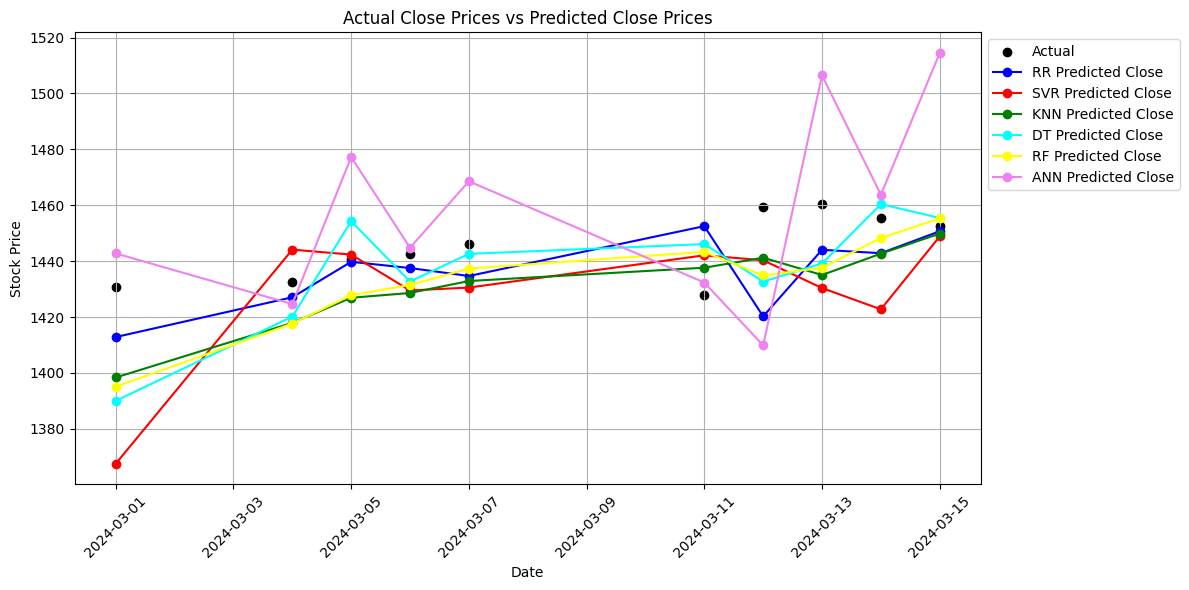

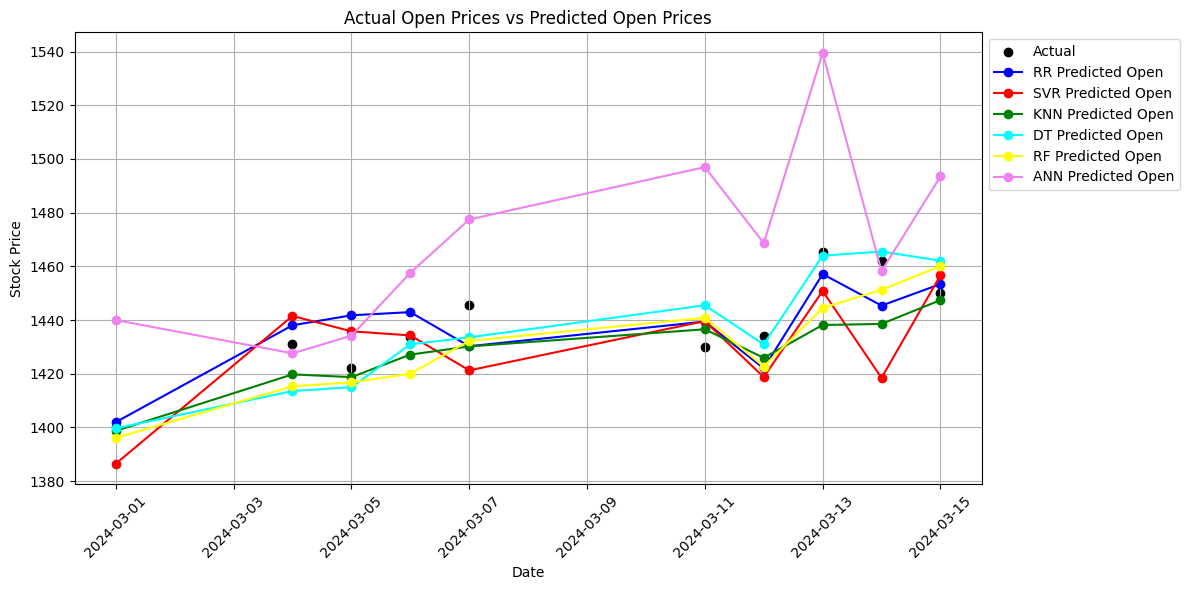

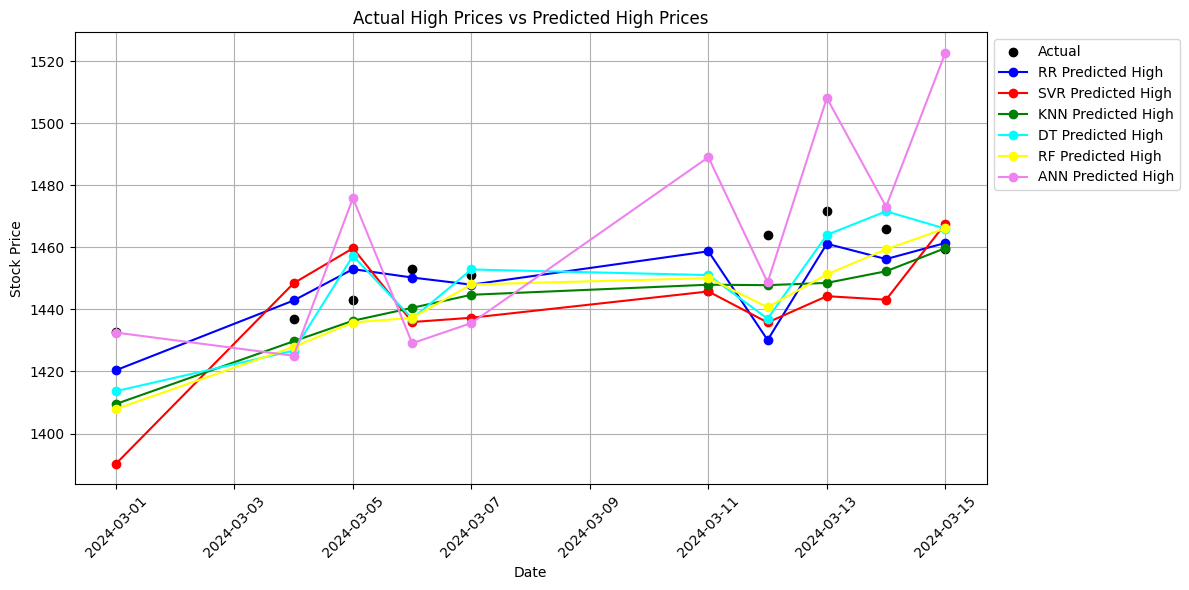

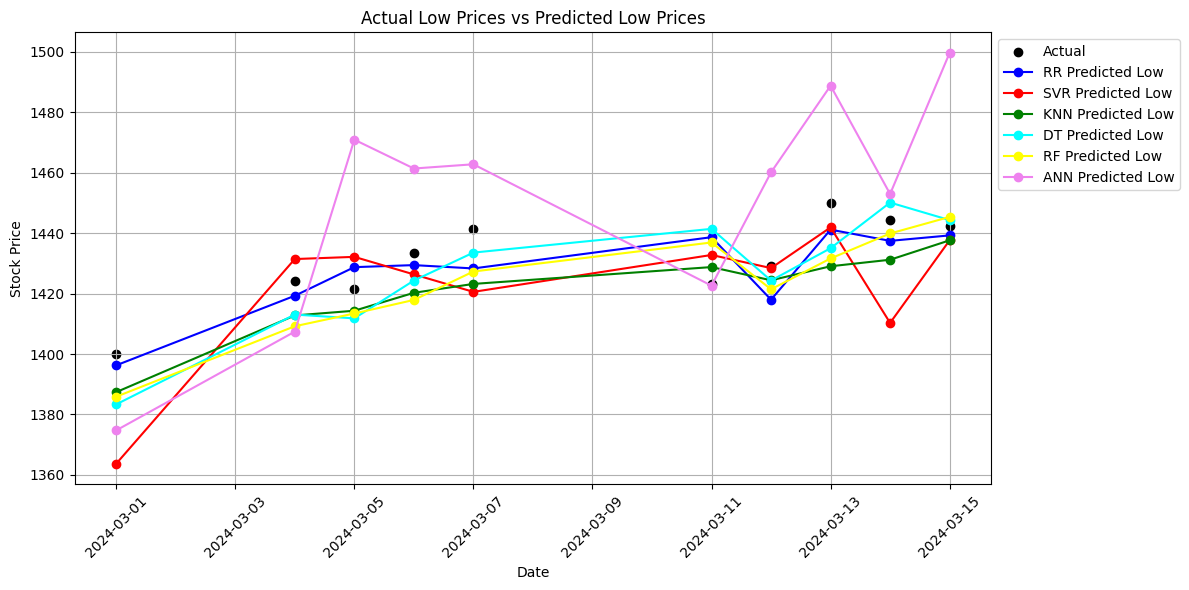

In [49]:
import matplotlib.pyplot as plt

# Plot actual and predicted close prices
plt.figure(figsize=(12, 6))
plt.scatter(result_df.index, result_df['Actual Close'], marker='o', label='Actual', color='black')
plt.plot(result_df.index, result_df['RR Predicted Close'], marker='o', label='RR Predicted Close', color='blue')
plt.plot(result_df.index, result_df['SVR Predicted Close'], marker='o', label='SVR Predicted Close', color='red')
plt.plot(result_df.index, result_df['KNN Predicted Close'], marker='o', label='KNN Predicted Close', color='green')
plt.plot(result_df.index, result_df['DT Predicted Close'], marker='o', label='DT Predicted Close', color='cyan')
plt.plot(result_df.index, result_df['RF Predicted Close'], marker='o', label='RF Predicted Close', color='yellow')
plt.plot(result_df.index, result_df['ANN Predicted Close'], marker='o', label='ANN Predicted Close', color='violet')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual Close Prices vs Predicted Close Prices')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot actual and predicted open prices
plt.figure(figsize=(12, 6))
plt.scatter(result_df.index, result_df['Actual Open'], marker='o', label='Actual', color='black')
plt.plot(result_df.index, result_df['RR Predicted Open'], marker='o', label='RR Predicted Open', color='blue')
plt.plot(result_df.index, result_df['SVR Predicted Open'], marker='o', label='SVR Predicted Open', color='red')
plt.plot(result_df.index, result_df['KNN Predicted Open'], marker='o', label='KNN Predicted Open', color='green')
plt.plot(result_df.index, result_df['DT Predicted Open'], marker='o', label='DT Predicted Open', color='cyan')
plt.plot(result_df.index, result_df['RF Predicted Open'], marker='o', label='RF Predicted Open', color='yellow')
plt.plot(result_df.index, result_df['ANN Predicted Open'], marker='o', label='ANN Predicted Open', color='violet')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual Open Prices vs Predicted Open Prices')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot actual and predicted high prices
plt.figure(figsize=(12, 6))
plt.scatter(result_df.index, result_df['Actual High'], marker='o', label='Actual', color='black')
plt.plot(result_df.index, result_df['RR Predicted High'], marker='o', label='RR Predicted High', color='blue')
plt.plot(result_df.index, result_df['SVR Predicted High'], marker='o', label='SVR Predicted High', color='red')
plt.plot(result_df.index, result_df['KNN Predicted High'], marker='o', label='KNN Predicted High', color='green')
plt.plot(result_df.index, result_df['DT Predicted High'], marker='o', label='DT Predicted High', color='cyan')
plt.plot(result_df.index, result_df['RF Predicted High'], marker='o', label='RF Predicted High', color='yellow')
plt.plot(result_df.index, result_df['ANN Predicted High'], marker='o', label='ANN Predicted High', color='violet')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual High Prices vs Predicted High Prices')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot actual and predicted low prices
plt.figure(figsize=(12, 6))
plt.scatter(result_df.index, result_df['Actual Low'], marker='o', label='Actual', color='black')
plt.plot(result_df.index, result_df['RR Predicted Low'], marker='o', label='RR Predicted Low', color='blue')
plt.plot(result_df.index, result_df['SVR Predicted Low'], marker='o', label='SVR Predicted Low', color='red')
plt.plot(result_df.index, result_df['KNN Predicted Low'], marker='o', label='KNN Predicted Low', color='green')
plt.plot(result_df.index, result_df['DT Predicted Low'], marker='o', label='DT Predicted Low', color='cyan')
plt.plot(result_df.index, result_df['RF Predicted Low'], marker='o', label='RF Predicted Low', color='yellow')
plt.plot(result_df.index, result_df['ANN Predicted Low'], marker='o', label='ANN Predicted Low', color='violet')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual Low Prices vs Predicted Low Prices')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
import pandas as pd

# Assuming result_df is your DataFrame with the predicted prices
# Convert the index to a DateTimeIndex
result_df.index = pd.to_datetime(result_df.index)

# Convert the DateTimeIndex to the desired date format
result_df.index = result_df.index.strftime('%Y-%m-%d')

# Create DataFrames with the actual and predicted prices
data_close = {
    'Actual Close': result_df['Actual Close'],
    'RR Predicted Close': result_df['RR Predicted Close'],
    'SVR Predicted Close': result_df['SVR Predicted Close'],
    'KNN Predicted Close': result_df['KNN Predicted Close'],
    'DT Predicted Close': result_df['DT Predicted Close'],
    'RF Predicted Close': result_df['RF Predicted Close'],
    'ANN Predicted Close': result_df['ANN Predicted Close']
}
df_close = pd.DataFrame(data_close)

data_open = {
    'Actual Open': result_df['Actual Open'],
    'RR Predicted Open': result_df['RR Predicted Open'],
    'SVR Predicted Open': result_df['SVR Predicted Open'],
    'KNN Predicted Open': result_df['KNN Predicted Open'],
    'DT Predicted Open': result_df['DT Predicted Open'],
    'RF Predicted Open': result_df['RF Predicted Open'],
    'ANN Predicted Open': result_df['ANN Predicted Open']
}
df_open = pd.DataFrame(data_open)

data_high = {
    'Actual High': result_df['Actual High'],
    'RR Predicted High': result_df['RR Predicted High'],
    'SVR Predicted High': result_df['SVR Predicted High'],
    'KNN Predicted High': result_df['KNN Predicted High'],
    'DT Predicted High': result_df['DT Predicted High'],
    'RF Predicted High': result_df['RF Predicted High'],
    'ANN Predicted High': result_df['ANN Predicted High']
}
df_high = pd.DataFrame(data_high)

data_low = {
    'Actual Low': result_df['Actual Low'],
    'RR Predicted Low': result_df['RR Predicted Low'],
    'SVR Predicted Low': result_df['SVR Predicted Low'],
    'KNN Predicted Low': result_df['KNN Predicted Low'],
    'DT Predicted Low': result_df['DT Predicted Low'],
    'RF Predicted Low': result_df['RF Predicted Low'],
    'ANN Predicted Low': result_df['ANN Predicted Low']
}
df_low = pd.DataFrame(data_low)

# Save the DataFrames to an Excel file
with pd.ExcelWriter('predicted_prices.xlsx') as writer:
    df_close.to_excel(writer, sheet_name='Close Prices')
    df_open.to_excel(writer, sheet_name='Open Prices')
    df_high.to_excel(writer, sheet_name='High Prices')
    df_low.to_excel(writer, sheet_name='Low Prices')
